<a href="https://colab.research.google.com/github/rafif22-sys/2025_VisiKomputer_TI-2A/blob/main/Jobsheet02_VisiKomputer_RafifAli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


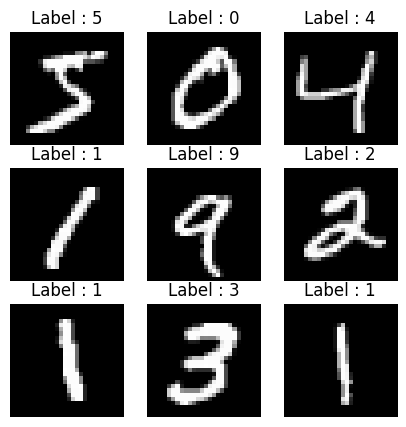

In [1]:
#PRAKTIKUM 1
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#Load Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Tampilkan Contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(f"Label : {y_train[i]}")
  plt.axis('off')
plt.show()

In [2]:
# Praktikum 2
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flattern
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1)/ 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred =  clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.8968 - loss: 0.3505 - val_accuracy: 0.9813 - val_loss: 0.0727
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9802 - loss: 0.0669 - val_accuracy: 0.9868 - val_loss: 0.0531
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9866 - loss: 0.0428 - val_accuracy: 0.9863 - val_loss: 0.0532
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9904 - loss: 0.0296 - val_accuracy: 0.9843 - val_loss: 0.0586
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9863 - val_loss: 0.0595


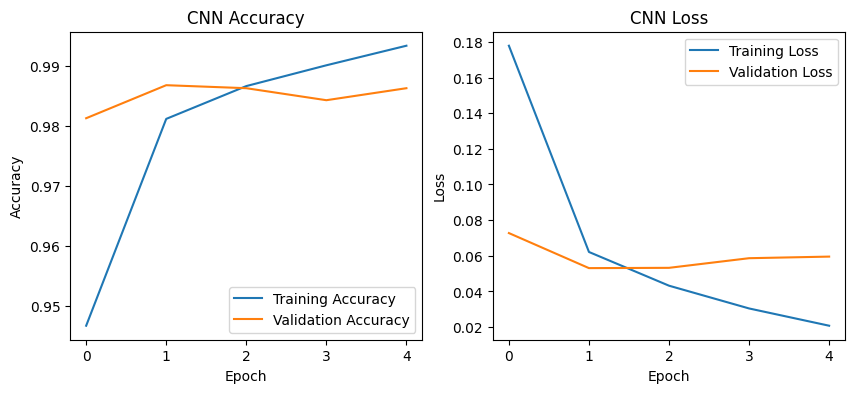

In [3]:
# Praktikum 3
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ==== Plot History ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 44ms/step - accuracy: 0.3426 - loss: 1.7832 - val_accuracy: 0.5652 - val_loss: 1.2377
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.5640 - loss: 1.2339 - val_accuracy: 0.6034 - val_loss: 1.1066
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6326 - loss: 1.0477 - val_accuracy: 0.6302 - val_loss: 1.0481
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.6687 - loss: 0.9540 - val_accuracy: 0.6608 - val_loss: 1.0001
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.6908 - loss: 0.8908 - val_accuracy: 0.6734 - val_loss: 0.9341
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.7100 - loss: 0.8386 - val_accuracy: 0.6950 - val_loss: 0.8842
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 87s 44ms/step - accuracy: 0.7254 - loss: 0.7926 - val_accuracy: 0.6958 - val_loss: 0.8856
Epoch 8/10
1407/1407 ━━

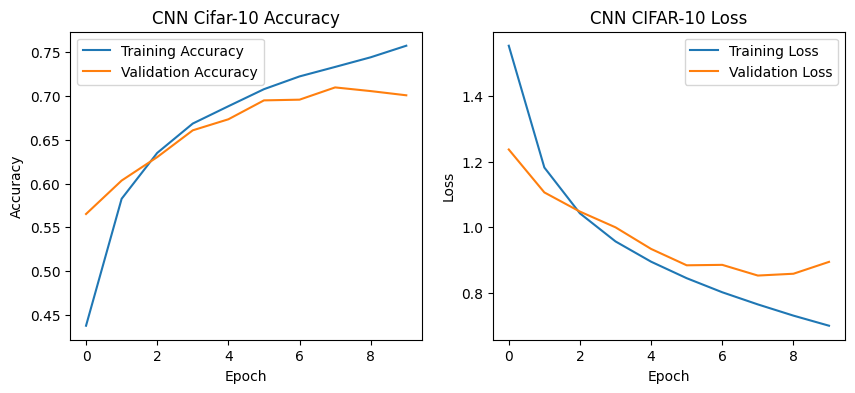

In [4]:
# PRAKTIKUM 4
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

history = model.fit(x_train, y_train, epochs=10, validation_split = 0.1)

# ====== PLOT HISTORY ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Cifar-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 636s 451ms/step - accuracy: 0.4686 - loss: 1.5418 - val_accuracy: 0.5626 - val_loss: 1.2324
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 674s 445ms/step - accuracy: 0.5820 - loss: 1.1983 - val_accuracy: 0.5914 - val_loss: 1.1667
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 682s 445ms/step - accuracy: 0.5981 - loss: 1.1347 - val_accuracy: 0.6016 - val_loss: 1.1414
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 682s 445ms/step - accuracy: 0.6170 - loss: 1.0990 - val_accuracy: 0.6110 - val_loss: 1.1250
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 683s 446ms/step - accuracy: 0.6292 - loss: 1.0608 - val_accuracy: 0.6110 - val_loss: 1.1275


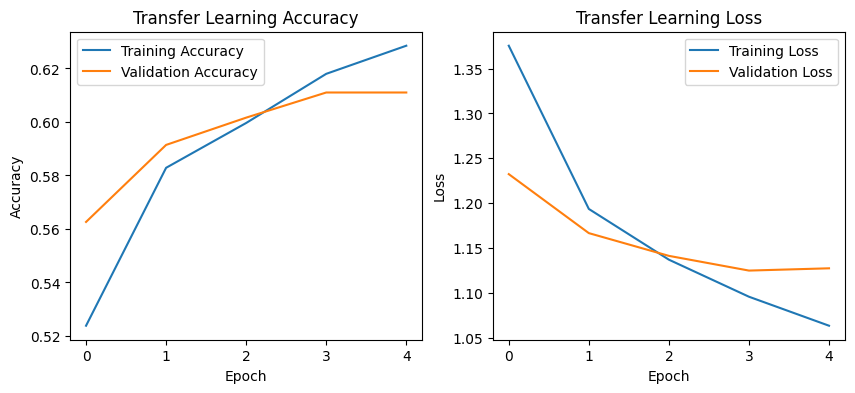

In [12]:
# Praktikum 5
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights = 'imagenet',include_top = False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split = 0.1)
# ==== Plot History =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 129s 410ms/step
              precision    recall  f1-score   support

           0       0.66      0.69      0.68      1000
           1       0.60      0.71      0.65      1000
           2       0.47      0.55      0.50      1000
           3       0.52      0.32      0.39      1000
           4       0.72      0.33      0.45      1000
           5       0.48      0.61      0.54      1000
           6       0.61      0.68      0.64      1000
           7       0.66      0.65      0.65      1000
           8       0.69      0.75      0.72      1000
           9       0.59      0.63      0.61      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.58     10000
weighted avg       0.60      0.59      0.58     10000



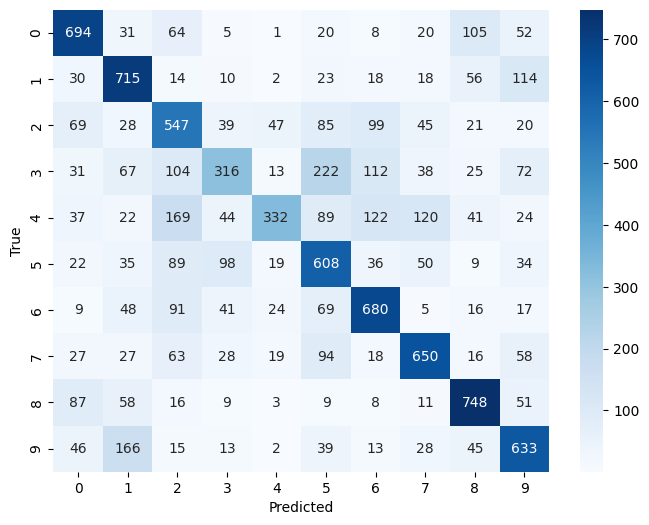

In [13]:
 #Praktikum 6
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()